# Intro

Overview of Main Points:
- This dataset is about video-games.
- We collected it using google-form and QR-codes.
- We are going to do Market Segmentation on it using Machine learning algorithms.
- Our Machine learning models will be k-means clustering and PCA for dimensionality reduction.

Access data from Dataset drive [link](https://drive.google.com/file/d/1b7JTM9PaWQHwiGFYDEne3eFFxI8WaCgo/view). It has 222 Record.<br><br>
Column-Names (Google-form Quesions):
- Username : Username
- Age : How old are you?
- Gender : Kindly select your gender ?
- Games-Lovers : How much do you like playing video games?
- PC | Laptop | Console : Where do you usually play video games?
- Game-type : What type of video games do you like to play?
- Games : What game do you play ?
- Play-Games H/W : How much time in a week do you spend on video games ? ( in hours )
- ?PlayInWeekend : Do you play in the weekends?
- ?PlayInBusyTimes : Do you play video games even if you are very busy?
- ?GamesUseful : Do you believe video games teach you something?

# Loading Libraries and Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Read dataset as panadas data-frame
df = pd.read_csv('Dataset.csv')

In [3]:
# Display the head of the dataset
df.head()

,Username,Age,Gender,Games-Lovers,PC | Laptop | Console,Game-type,Games,Play-Games H/W,?PlayInWeekend,?PlayInBusyTimes,?GameBenefit
0,*********************,from 18 to 20,Male,Some What,PC Or Laptop,FPS Shooter,Valorant;Fortnite;COD-WarZone,3.0,Yes,No,Yes
1,*********************,from 18 to 20,Female,Not Really,Console,Role play games,Valorant;Pubg;Fortnite;COD-WarZone;Fifa,13.0,No,Yes,No
2,*********************,from 18 to 20,Female,Not at all,MobilePhone,Adventure,Others,0.0,No,No,No
3,*********************,from 18 to 20,Male,Very much,PC Or Laptop;Console,Action;Adventure;Role play games,Valorant;Others,14.0,Yes,No,Yes
4,*********************,from 18 to 20,Male,Very much,PC Or Laptop;Console,Action;Adventure;Role play games,Valorant;Others,14.0,Yes,No,Yes


In [4]:
# numerical values statistics
df.describe()

,Play-Games H/W
count,220.000000
mean,16.154545
std,67.802855
min,0.000000
25%,2.750000
50%,6.000000
75%,14.000000
max,888.000000


In [5]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Username               221 non-null    object 
 1   Age                    221 non-null    object 
 2   Gender                 219 non-null    object 
 3   Games-Lovers           221 non-null    object 
 4   PC | Laptop | Console  219 non-null    object 
 5   Game-type              221 non-null    object 
 6   Games                  221 non-null    object 
 7   Play-Games H/W         220 non-null    float64
 8   ?PlayInWeekend         221 non-null    object 
 9   ?PlayInBusyTimes       221 non-null    object 
 10  ?GameBenefit           221 non-null    object 
dtypes: float64(1), object(10)
memory usage: 19.1+ KB


# Data Cleaning

In [6]:
# Drop "Username" and "Ply in weekend" columns beacuse they're unnecessary & Useless in the task
df = df.drop(columns=["Username", "?PlayInWeekend"], axis=1)

In [7]:
# "PC | Laptop | Console" Column name is not expressive, rename it
df = df.rename(columns = {'PC | Laptop | Console' : 'Machine-Setup'})

In [8]:
# Count number of dublicated rows
df.duplicated().sum()

9

In [9]:
# remove duplicates
df = df.drop_duplicates()

In [10]:
# Count number of nulls in each column
df.isna().sum()

,0
Age,0
Gender,2
Games-Lovers,0
Machine-Setup,2
Game-type,0
Games,0
Play-Games H/W,1
?PlayInBusyTimes,0
?GameBenefit,0


In [11]:
# deal with nulls
play_hours_med = df["Play-Games H/W"].median()
df["Play-Games H/W"] = df["Play-Games H/W"].fillna(play_hours_med) # fill with median
df = df.dropna() # remove

<ipython-input-11-ec6ac62b1ab1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Play-Games H/W"] = df["Play-Games H/W"].fillna(play_hours_med) # fill with median


In [12]:
# clip the values in hours per week to be in (0, 50)
df['Play-Games H/W'] = df['Play-Games H/W'].clip(0, 50)

# Data Exploration

Perform data exploration by using some aggregate functions and data visualization tools.

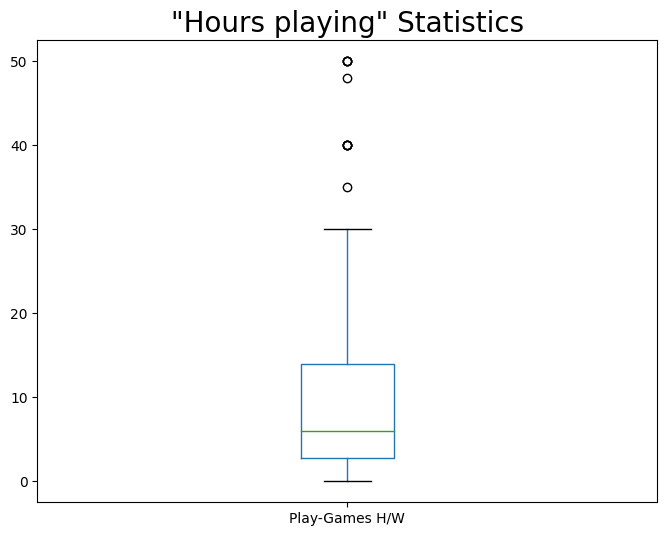

In [13]:
plt.figure(figsize = (8, 6))
df.boxplot(column =['Play-Games H/W'], grid = False);

plt.title('"Hours playing" Statistics', fontsize=20);

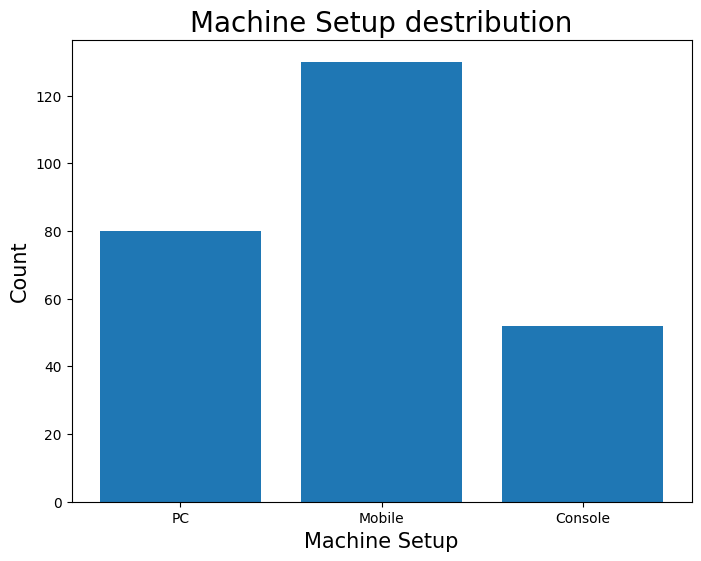

In [14]:
pc_count = df["Machine-Setup"].str.contains('PC').aggregate('sum')
mob_count = df["Machine-Setup"].str.contains('Mobile').aggregate('sum')
cons_count = df["Machine-Setup"].str.contains('Console').aggregate('sum')

plt.figure(figsize = (8, 6))
plt.bar(['PC', 'Mobile', 'Console'], [pc_count, mob_count, cons_count])

plt.xlabel("Machine Setup", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Machine Setup destribution", fontsize=20);

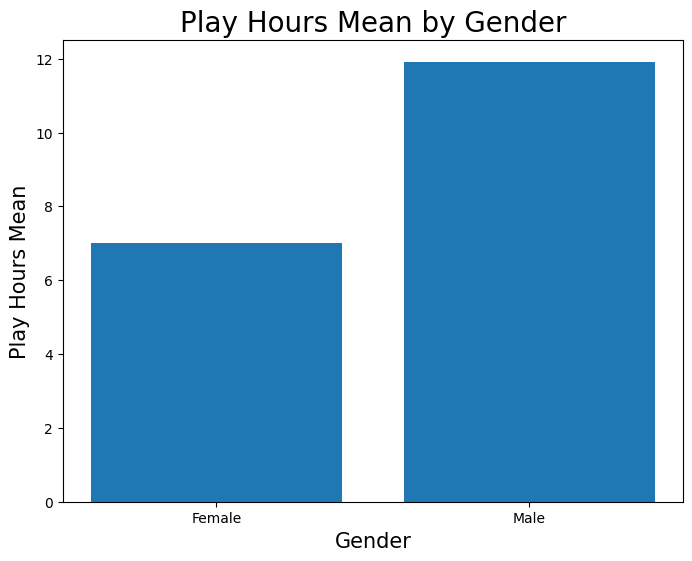

In [15]:
gender_play_mean = df.groupby('Gender')['Play-Games H/W'].aggregate('mean')

plt.figure(figsize = (8, 6))
plt.bar(gender_play_mean.keys(), gender_play_mean.values)

plt.xlabel("Gender", fontsize=15)
plt.ylabel("Play Hours Mean", fontsize=15)
plt.title("Play Hours Mean by Gender", fontsize=20);

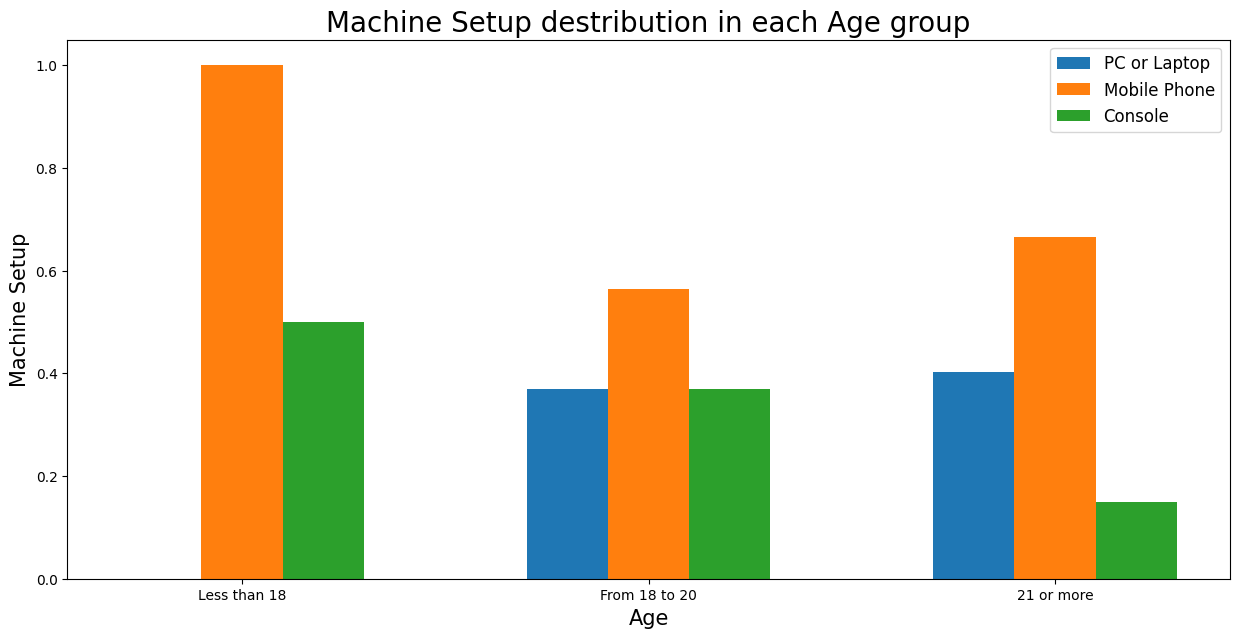

In [16]:
#gather data
y_pc = [0] * 3
y_mob = [0] * 3
y_cons = [0] * 3

y_pc[0] = len(df[(df["Age"]=="less than 18") & df["Machine-Setup"].str.contains('PC')]) / len(df[(df["Age"]=="less than 18")])
y_mob[0] = len(df[(df["Age"]=="less than 18") & df["Machine-Setup"].str.contains('Mobile')]) / len(df[(df["Age"]=="less than 18")])
y_cons[0] = len(df[(df["Age"]=="less than 18") & df["Machine-Setup"].str.contains('Console')]) / len(df[(df["Age"]=="less than 18")])

y_pc[1] = len(df[(df["Age"]=="from 18 to 20") & df["Machine-Setup"].str.contains('PC')]) / len(df[(df["Age"]=="from 18 to 20")])
y_mob[1] = len(df[(df["Age"]=="from 18 to 20") & df["Machine-Setup"].str.contains('Mobile')]) / len(df[(df["Age"]=="from 18 to 20")])
y_cons[1] = len(df[(df["Age"]=="from 18 to 20") & df["Machine-Setup"].str.contains('Console')]) / len(df[(df["Age"]=="from 18 to 20")])

y_pc[2] = len(df[(df["Age"]=="21 or more") & df["Machine-Setup"].str.contains('PC')]) / len(df[(df["Age"]=="21 or more")])
y_mob[2] = len(df[(df["Age"]=="21 or more") & df["Machine-Setup"].str.contains('Mobile')]) / len(df[(df["Age"]=="21 or more")])
y_cons[2] = len(df[(df["Age"]=="21 or more") & df["Machine-Setup"].str.contains('Console')]) / len(df[(df["Age"]=="21 or more")])

#plot
X = ['Less than 18', 'From 18 to 20', '21 or more']
X_axis = np.arange(len(X))
plt.figure(figsize=(15,7))
plt.bar(X_axis - 0.2, y_pc, 0.2, label = 'PC or Laptop')
plt.bar(X_axis, y_mob, 0.2, label = 'Mobile Phone')
plt.bar(X_axis + 0.2, y_cons, 0.2, label = 'Console')

plt.xticks(X_axis, X)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Machine Setup", fontsize=15)
plt.title("Machine Setup destribution in each Age group", fontsize=20)
plt.legend(fontsize=12);

# Categorical Data Encoding

Perform label encoding for categorical data as this is necessary for the machine learning models.

In [17]:
df_relabeled = df.copy()

In [18]:
categ_col = ['Age','Gender','Games-Lovers','Machine-Setup','Game-type','Games','?PlayInBusyTimes','?GameBenefit']
ordinal_encoder = OrdinalEncoder()
df_relabeled[categ_col] = ordinal_encoder.fit_transform(df_relabeled[categ_col])
original_values = ordinal_encoder.categories_

In [19]:
# the original values ordered by their encoded number
original_values_dict = dict(zip(df_relabeled[categ_col], original_values))

In [20]:
df_relabeled.describe()

,Age,Gender,Games-Lovers,Machine-Setup,Game-type,Games,Play-Games H/W,?PlayInBusyTimes,?GameBenefit
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.461538,0.649038,2.120192,2.288462,28.860577,17.230769,10.192308,0.302885,0.721154
std,0.518695,0.478422,0.937659,1.959360,22.105911,11.746296,11.101270,0.460614,0.449514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,8.750000,8.750000,2.750000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,1.000000,26.000000,14.000000,6.000000,0.000000,1.000000
75%,1.000000,1.000000,3.000000,5.000000,51.000000,21.250000,14.000000,1.000000,1.000000
max,2.000000,1.000000,3.000000,6.000000,63.000000,50.000000,50.000000,1.000000,1.000000


# Perform Clustering and PCA

The number of clusters is choosed based on the 'Elbow method' and qualitative analysis.

In [21]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(df_relabeled)
    scores.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

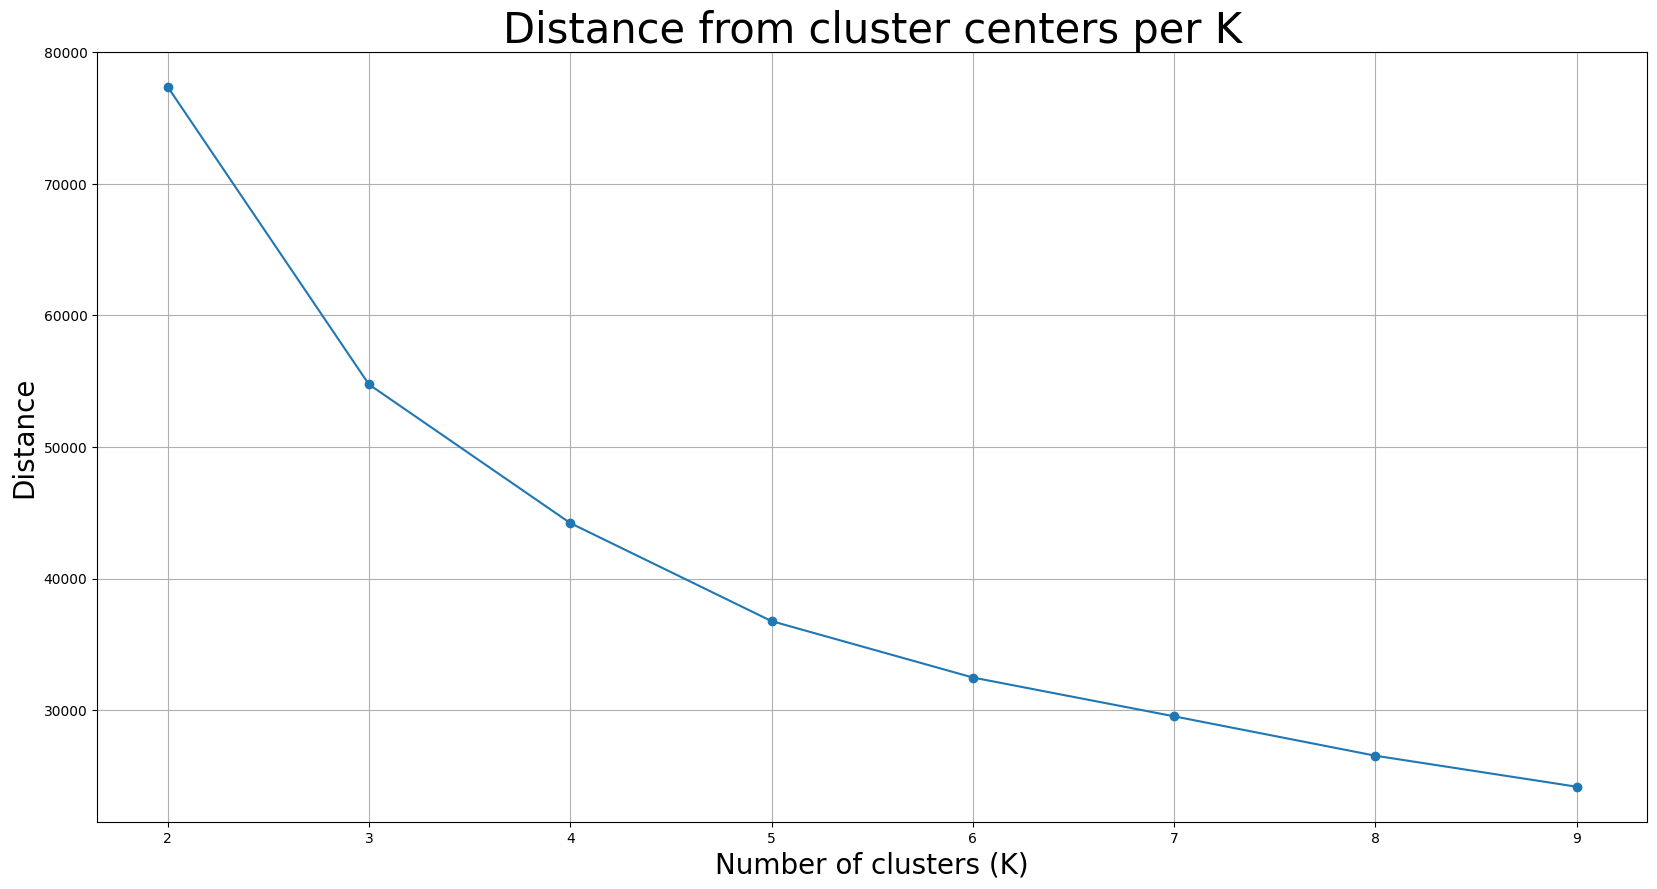

In [22]:
plt.figure(figsize=(20,10))
x_axis = np.arange(2, 10)
y_axis = scores
plt.plot(x_axis, y_axis, marker='o')
plt.grid(True)
plt.xlabel("Number of clusters (K)", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title("Distance from cluster centers per K", fontsize=30);

In [23]:
pca = PCA(n_components = 2)
df_2D = pca.fit_transform(df_relabeled.values)

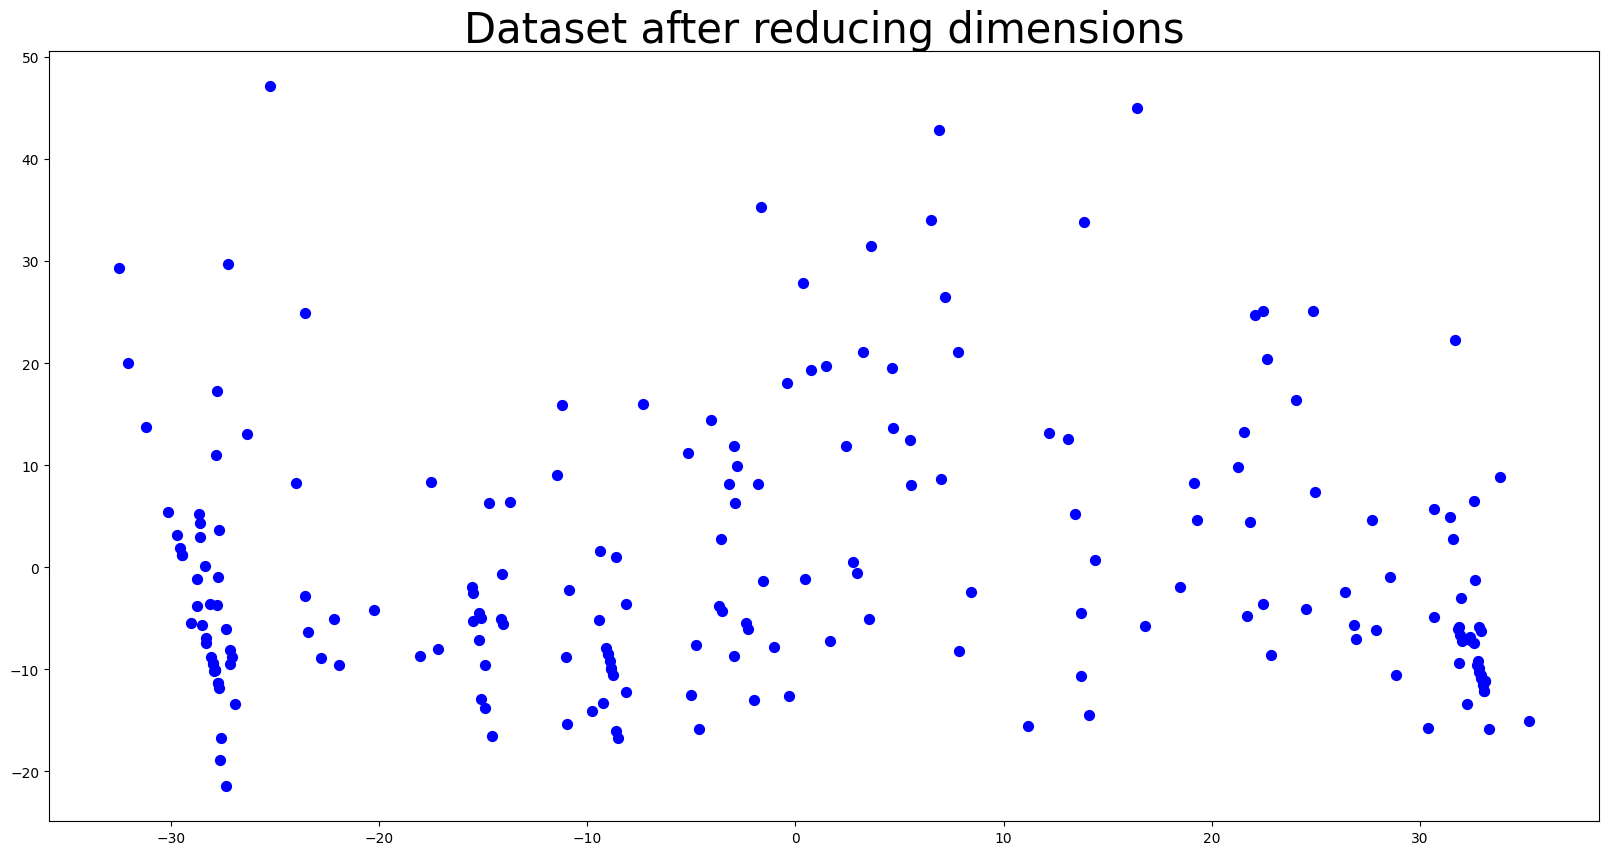

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(df_2D[:,0], df_2D[:,1], s=50, color='b')
plt.title("Dataset after reducing dimensions", fontsize=30);

In [25]:
k = 4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df_relabeled)
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Visualizing the Results

In [26]:
centers_2D = pca.transform(centers)

<ipython-input-27-bb23c62bac63>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_clusters)


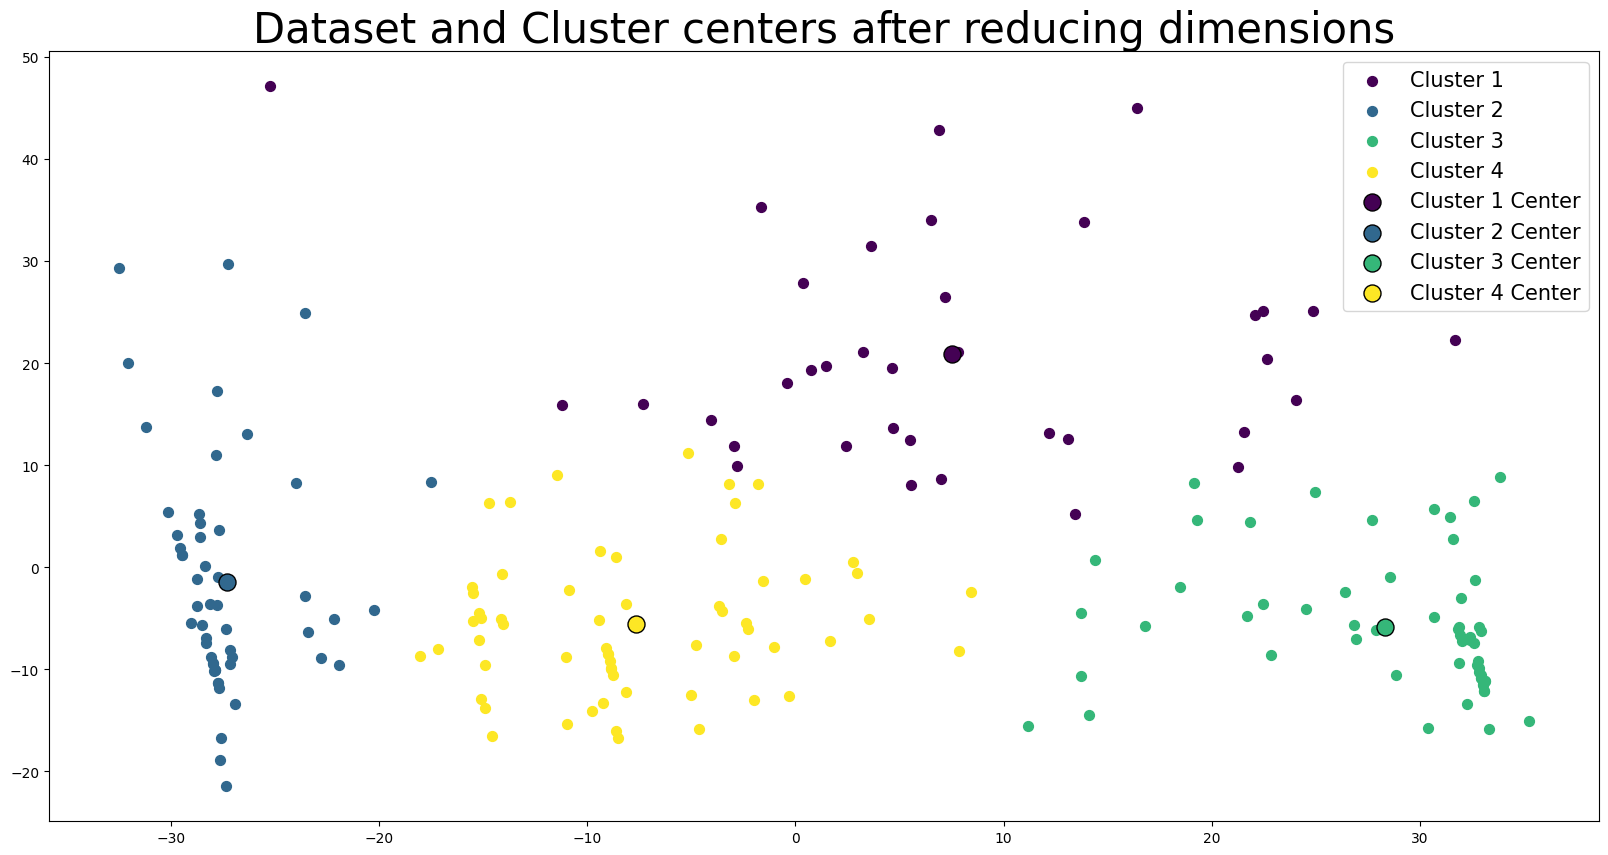

In [27]:
# Assuming y_pred contains the cluster labels
num_clusters = len(np.unique(y_pred))
colors = plt.cm.get_cmap('viridis', num_clusters)

plt.figure(figsize=(20,10))

# Scatter plot for each cluster with corresponding colors
for cluster in range(num_clusters):
    plt.scatter(df_2D[y_pred == cluster, 0],
                df_2D[y_pred == cluster, 1],
                s=50,
                color=colors(cluster),
                label=f'Cluster {cluster + 1}')

# Scatter plot for cluster centers with corresponding colors
for cluster in range(num_clusters):
    plt.scatter(centers_2D[cluster, 0],
                centers_2D[cluster, 1],
                s=150,
                color=colors(cluster),
                edgecolor='black',
                label=f'Cluster {cluster + 1} Center')

plt.title("Dataset and Cluster centers after reducing dimensions", fontsize=30)
plt.legend(fontsize=15)
plt.show()

In [28]:
centers_df = pd.DataFrame(centers, columns=df.columns)
centers_df.round(2)

,Age,Gender,Games-Lovers,Machine-Setup,Game-type,Games,Play-Games H/W,?PlayInBusyTimes,?GameBenefit
0,0.58,0.89,2.44,4.31,37.89,35.31,19.97,0.53,0.78
1,0.47,0.62,2.06,2.08,1.57,16.79,11.98,0.30,0.72
2,0.41,0.55,2.05,1.78,56.69,10.79,5.33,0.22,0.72
3,0.43,0.62,2.05,1.77,20.79,13.07,7.49,0.25,0.69


# Business Recommendations

This project can be useful for a video gaming company as it could:
- Customize ads and services for each segment.
- Develop new products based on interests of each segment.
- Recommend products for new customers by assigning the best cluster for each of them.